## Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

## Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process

Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting


## Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

 -----------------------------------------------------------------------------------------------------------------

1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
display(customer_df.shape)

display(customer_df.head())

customer_df.info()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
cols=[]
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns=cols

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


5. Change effective to date column to datetime format.

In [5]:
print(customer_df.effective_to_date.unique())

['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']


In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

print(customer_df.effective_to_date.unique())

customer_df.head()

['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-02-28T00:00:00.000000000' '2011-02-12T00:00:00.000000000'
 '2011-02-02T00:00:00.000000000' '2011-02-07T00:00:00.000000000'
 '2011-01-22T00:00:00.000000000' '2011-02-13T00:00:00.000000000'
 '2011-01-15T00:00:00.000000000' '2011-01-08T00:00:00.000000000'
 '2011-01-11T00:00:00.000000000' '2011-01-28T00:00:00.000000000'
 '2011-02-08T00:00:00.000

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [7]:
numerical_df = customer_df.select_dtypes(np.number)

display(numerical_df.head())

print(numerical_df.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


(9134, 8)


7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [9]:
def unique_values(df):
    unique_counts = df.nunique()
    return unique_counts


unique_counts=unique_values(numerical_df)

unique_counts

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [10]:
def select_discrete_continuous_variables (df):
    continuous_list = []
    discrete_list = []
    
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_list.append(col)
        else:
            continuous_list.append(col)
    
    return  (discrete_list, continuous_list)

In [11]:
discrete_list, continuous_list = select_discrete_continuous_variables(numerical_df)

In [12]:
print('Discrete List:  ', discrete_list)
print ('Continuous List:  ', continuous_list)

Discrete List:   ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
Continuous List:   ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [13]:
# Continuous variables: customer_lifetime_value, income, monthly_premium_auto, total_claim_amount:

# These variables show a wide range of values. Not distinct values.

In [14]:
# Discrete variables: months_since_last_claim, months_since_policy_inception,
#                     number_of_open_complaints, number_of_policies:

# These variables show a limited number of distinct and separate values.

8. Plot a correlation matrix, comment what you see.

In [15]:
# Checking correlations:

correlations = numerical_df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


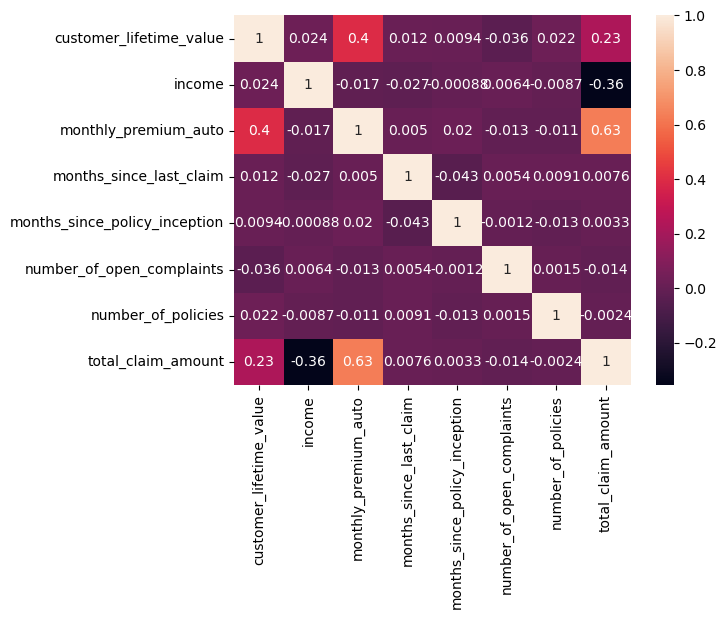

In [16]:
# Heatmap:

sns.heatmap(correlations, annot=True)
plt.show()

In [17]:
# -- Comments -- 

# Positive correlations:

# customer_lifetime_value and monthly_premium_auto have a strong positive correlation with 0,40 approx, telling us
# that when one of them increases, the other one increases aswell.

# total_claim_amount and monthly_premium_auto are strong correlated with 0,63 approx. telling us that the
# higher amount of monthly_premium_auto is associated with the higher total_claim_amount.


# Negative correlations:

# income and total_claim_amount have a moderate negative correlation of -0.36 approx.
# This implies that as income increases, total claim amounts tend to decrease.

# Weak Correlations:

# Most other correlations are weak, close to zero, no a strong linear relationship between them.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [18]:
def plot_numerical_variables(numerical_df):
    for column in numerical_df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=numerical_df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

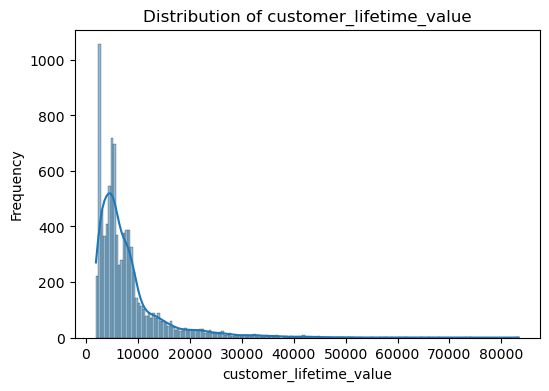

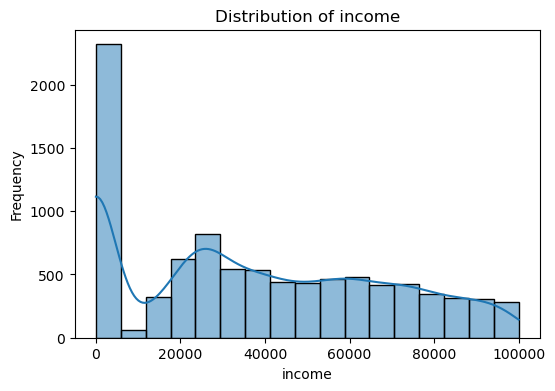

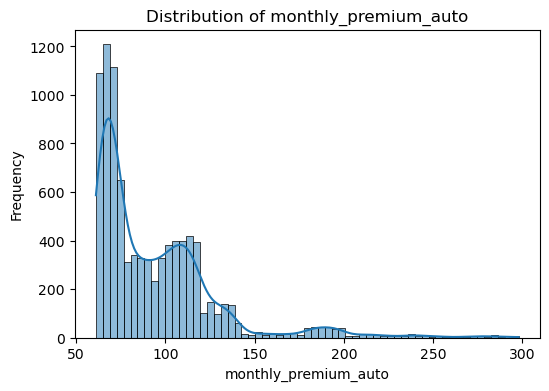

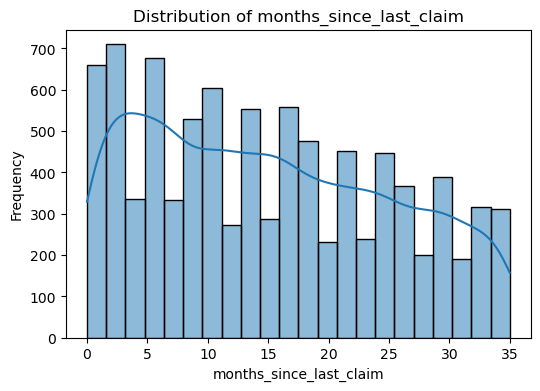

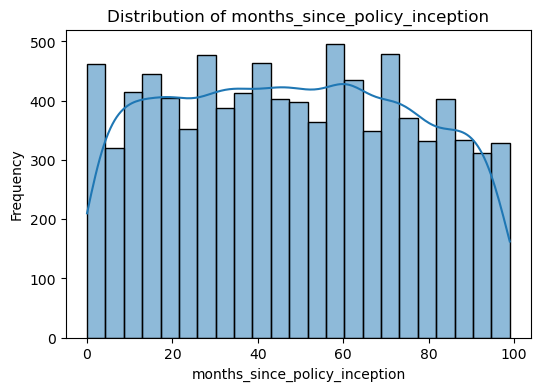

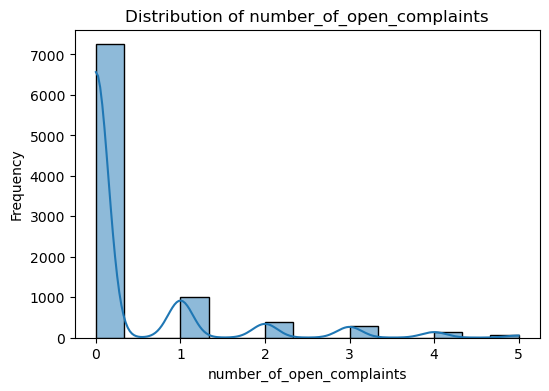

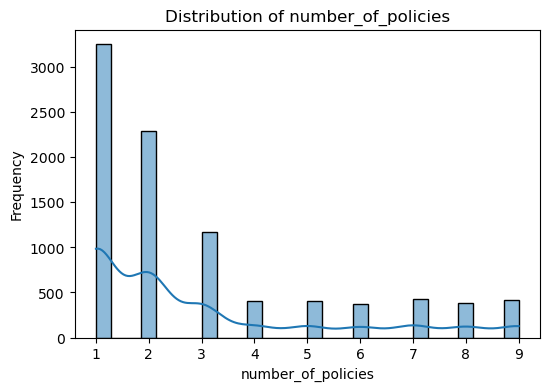

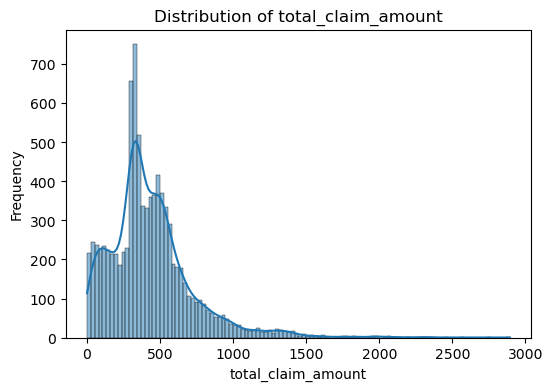

In [19]:
plot_numerical_variables(numerical_df)

10. Comment what you can see in the plots.

In [20]:
# -- Comments discrete plots -- 

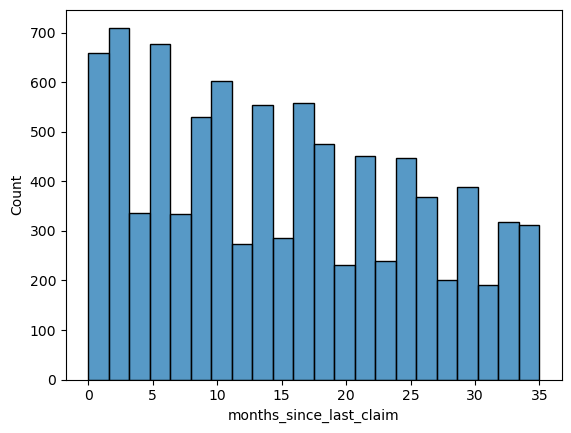

In [21]:
# months_since_last_claim plot:

sns.histplot(data=numerical_df, x='months_since_last_claim')
plt.show()


# A discrte variable showing a concret and distinct month.

# The distribution is right-skewed.

# The most common durations are around 3, 6, 1 and 4 months. 

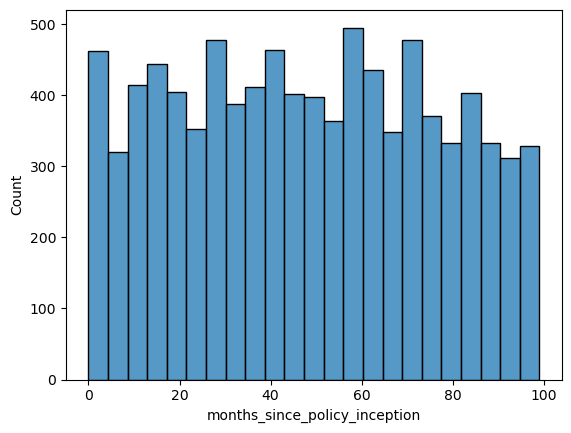

In [22]:
# months_since_policy_inception plot:

sns.histplot(data=numerical_df, x='months_since_policy_inception')
plt.show()
   
# The plot shows a wide range of durations, very spread.

# The most common durations are 59, 61, 50 and 44 but all are close.

# The distribution is slightly right-skewed.

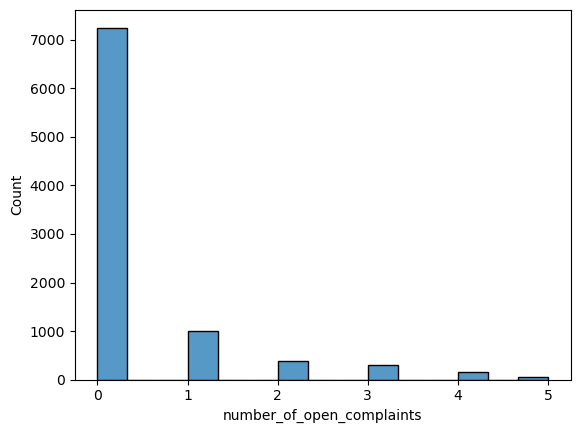

In [23]:
# number_of_open_complaints

sns.histplot(data=numerical_df, x='number_of_open_complaints')
plt.show()
    
# Highly imbalanced distribution because the most values are concentrated on 0 claims open.

# Most common scenario is no open complaints.

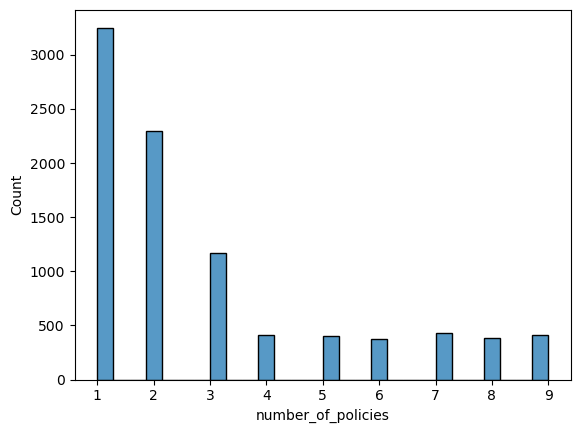

In [24]:
# number_of_policies

sns.histplot(data=numerical_df, x='number_of_policies')
plt.show()

    
# We see various number of policies, from 1 to 9.

# The most common are 1 and 2.

# Imbalanced distribution because the majority onlay have 1 or 2 policies.

---------------------------------------------------------

In [25]:
# -- Comments continuous plots -- 

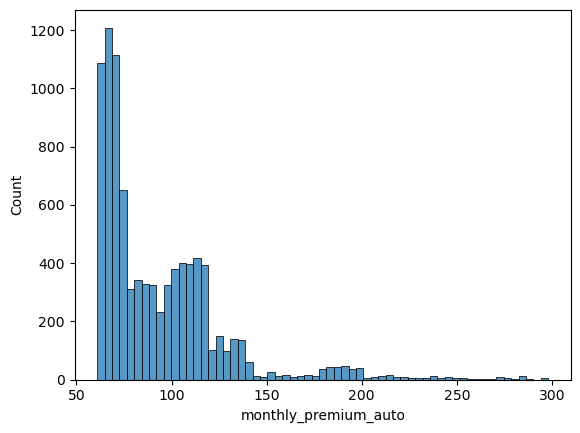

In [26]:
# monthly_premium_auto plot: 

sns.histplot(data=numerical_df, x='monthly_premium_auto')
plt.show()
    
# The plot shows us that the values for monthly_premium_auto vary widely, diversity in the amounts paid by customers.

# The most common are around 65, 66, 71 and 73. These are likely to be the most offered to customers.

# The distribution is right-skewed, with a long tail on the right side, showing that most customers pay lower or
# mid-range premiums and a few customers pay higher ones.

# The distribution shows the presence of variety of premium plans.

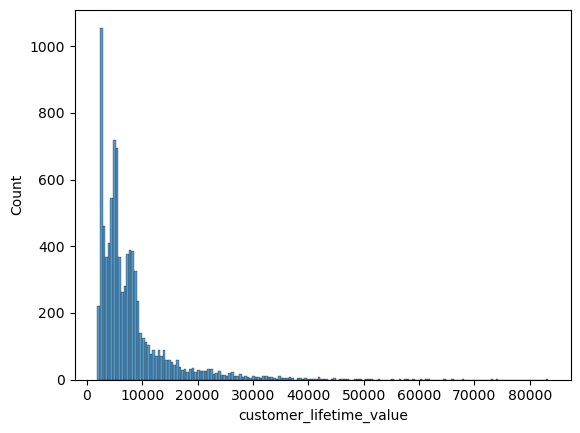

In [27]:
# customer_lifetime_value

sns.histplot(data=numerical_df, x='customer_lifetime_value')
plt.show()


# The distribution is right-skewed.

# The most customers have lower customer lifetime values with a concentration on the lower end.

# There is a wide range.

# The long tail on the right side contains outlaiers, with high CLTV.

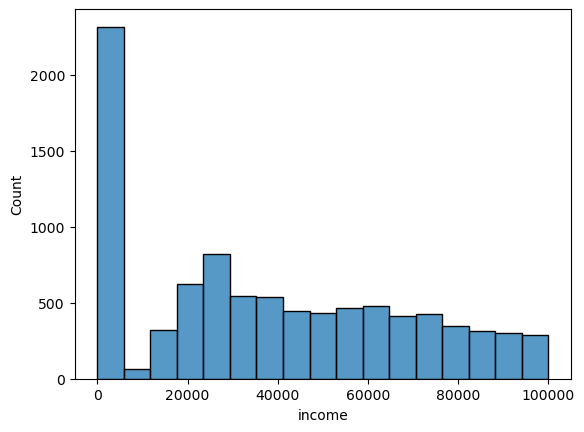

In [28]:
# income

sns.histplot(data=numerical_df, x='income')
plt.show()


# The distribution is right-skewed.

# The most customers have lower income with a concentration on the lower end.

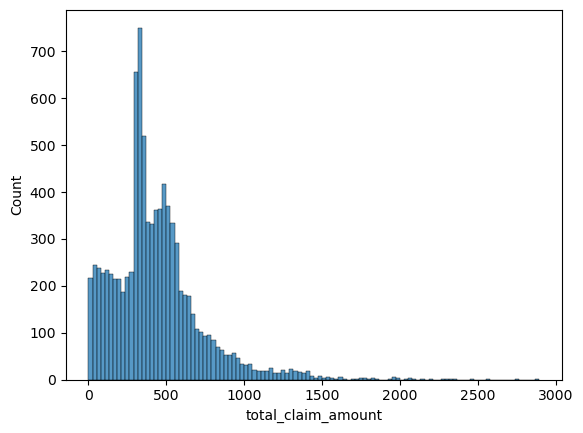

In [29]:
# total_claim_amount

sns.histplot(data=numerical_df, x='total_claim_amount')
plt.show()


# Right-skewed distribution.

# Concentrated on the lower end with a long tail extending towards the higher values.

# Most claims are relatively small but with many very large that contribute to the skeweness.

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [30]:
def boxplots_variables(df):
    plt.figure(figsize=(14, 8))
    for var in df.columns:
        plt.subplot(3, 3, df.columns.get_loc(var) + 1)
        sns.boxplot(data=df[var])
        plt.title(f'Box Plot for {var}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


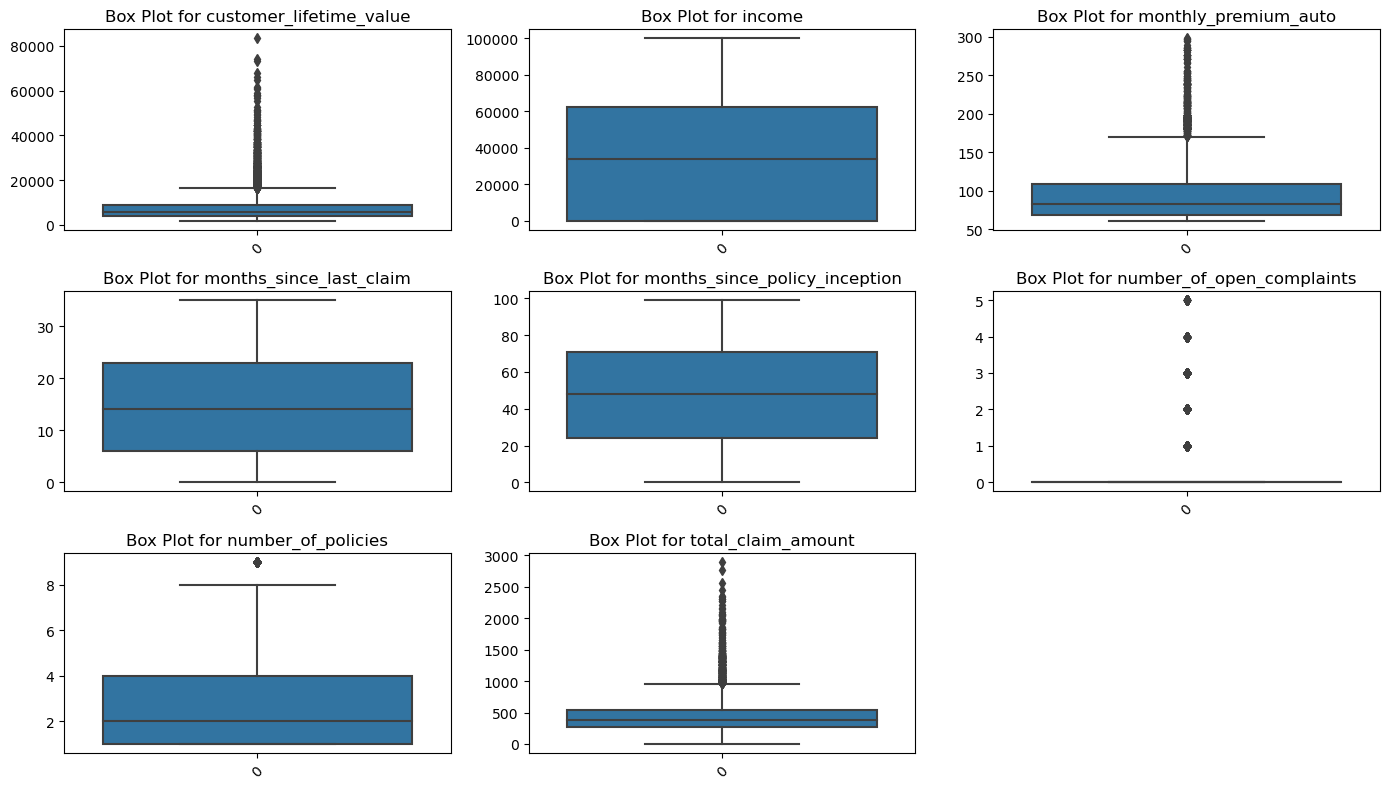

In [31]:
boxplots_variables(numerical_df)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [32]:
# The variables income, total claim amount, monthly premium auto and customer lifetime value have a large number of unique values 
# (5694, 5106, 202 and 8041 unique values):

# 1. income:

# High incomes: high-income individuals might be important for segmentation or understanding the customer base.


# 2. total claim amount:

# High claim amounts: Very high claim amounts might indicate severe or costly claims, which are essential for understanding claim patterns and assessing risk.


# 3. monthly premium auto:

# High monthly premium auto: Very high premiums could be the result of unique driving or vehicle characteristics, such as luxury or high-performance vehicles.


# 4. customer lifetime value:

# High customer lifetime values: high values could represent valuable customers, which are vita.


# In all cases, outliers could contain valuable information about specific customer segments, high-value customers, 
# or unique situations. 

# Removing outliers might result in the loss of important information.

# Therefore I am going to keep them.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [33]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [34]:
numerical_df.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [35]:
# No NaN for numerical features.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [36]:
numerical_df.to_csv('numerical.csv', index=False)

## Lab | Cleaning categorical data

For this lab, we will be using the same notebook as in the previous lab.

## Data Analysis Process

Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting

Instructions

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

1. Open the notebook created for Lab-cleaning-numerical-data.

-------------------------------------------------

2. Find all of the categorical data. Save it in a categorical_df variable.

In [37]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [38]:
categorical_df = customer_df.select_dtypes(include=object)

categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


3. Check for NaN values and decide what to do with them, do it now.

In [39]:
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [40]:
# No NaN for categorical variables.

4. Check all unique values of columns.

In [41]:
unique_values(categorical_df)

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

5. Check dtypes. Do they all make sense as categorical data?

In [42]:
categorical_df.dtypes

# The customer column represents unique customer references. It does not provide any categorical info.

# It would be more appropriate to consider as an index or identifier changing it to str.

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [43]:
categorical_df['customer'] = categorical_df['customer'].astype(str)

categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [44]:
for column in categorical_df.columns:
    unique_values = categorical_df[column].unique()
    print(f"{column}: {unique_values}")

customer: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response: ['No' 'Yes']
coverage: ['Basic' 'Extended' 'Premium']
education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender: ['F' 'M']
location_code: ['Suburban' 'Rural' 'Urban']
marital_status: ['Married' 'Single' 'Divorced']
policy_type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel: ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size: ['Medsize' 'Small' 'Large']


In [45]:
# Dropping customer column since it is only a unique identifier for the customers:

categorical_df=categorical_df.drop(columns=['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [46]:
display(categorical_df.head())
categorical_df.info()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


In [47]:
# Transforming response to binary:

categorical_df['response'] = categorical_df['response'].replace({'No': 0, 'Yes': 1})

categorical_df['response'].value_counts()

0    7826
1    1308
Name: response, dtype: int64

In [48]:
# Coverage to ordinal encode:

categorical_df['coverage'] = categorical_df['coverage'].map({'Basic': 0, 'Extended': .5, 'Premium': 1})

categorical_df['coverage'].value_counts()

0.0    5568
0.5    2742
1.0     824
Name: coverage, dtype: int64

In [49]:
# Combining bachelor and college and master and doctor:

categorical_df['education'] = categorical_df['education'].map({'High School or Below': 0, 'Bachelor': .5, 'College': .5, 'Master':1, 'Doctor':1})

categorical_df['education'].value_counts()

0.5    5429
0.0    2622
1.0    1083
Name: education, dtype: int64

In [50]:
# Renaming employmentstatus:

categorical_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)
categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,0,0.5,0.5,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,0,1.0,0.5,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,0,0.0,0.5,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,0,0.0,0.5,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [51]:
# Combining employment status:

categorical_df['employment_status'] = categorical_df['employment_status'].map({'Medical Leave': 0, 'Disabled': 0, 'Unemployed': 0, 'Retired':.5, 'Employed':2})

categorical_df['employment_status'].value_counts()

2.0    5698
0.0    3154
0.5     282
Name: employment_status, dtype: int64

In [52]:
# location_code to ordinal encode:

categorical_df['location_code'] = categorical_df['location_code'].map({'Rural': 0, 'Suburban': .5, 'Urban': 1})

categorical_df['location_code'].value_counts()

0.5    5779
0.0    1773
1.0    1582
Name: location_code, dtype: int64

In [53]:
# Grouping policy to reduce the number of categories:

def clean_policy(x):
    if x in ['Personal L3', 'Personal L2', 'Personal L1']:
        return 'Personal'
    elif x in ['Corporate L3', 'Corporate L2', 'Corporate L1']:
        return 'Corporate'
    else:
        return 'Special'
    
categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)
categorical_df.policy.value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

In [54]:
# Grouping vehicle class to reduce the number of categories:

categorical_df['vehicle_class']=categorical_df['vehicle_class'].str.replace('Sports Car', 'Luxury').str.replace('Luxury SUV', 'Luxury').str.replace('Luxury Car', 'Luxury')

categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [55]:
# vehicle_size to ordinal:

categorical_df['vehicle_size'] = categorical_df['vehicle_size'].map({'Small': 0, 'Medsize': .5, 'Large': 1})

categorical_df['vehicle_size'].value_counts()

0.5    6424
0.0    1764
1.0     946
Name: vehicle_size, dtype: int64

In [56]:
# I already grouped policy (L1,L2,L3 into the main policy).

In [57]:
# Comparing, once grouped policy, policy type with policy:

display(categorical_df.policy.value_counts())

display(categorical_df.policy_type.value_counts())

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [58]:
# What we can see is that the sum of each category inside the policy is equal to the personal type.

# So we could drop policy and mantain the policy_type since it contains the same information.

In [59]:
# Dropping policy and keepping policy type:

categorical_df=categorical_df.drop(columns=['policy'], axis=1)
categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Offer1,Agent,Two-Door Car,0.5
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Offer3,Agent,Four-Door Car,0.5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Offer1,Agent,Two-Door Car,0.5
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Offer1,Call Center,SUV,0.5
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Offer1,Agent,Four-Door Car,0.5


In [60]:
categorical_df.dtypes

state                 object
response               int64
coverage             float64
education            float64
employment_status    float64
gender                object
location_code        float64
marital_status        object
policy_type           object
renew_offer_type      object
sales_channel         object
vehicle_class         object
vehicle_size         float64
dtype: object

10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [61]:
categorical_df.to_csv('categorical.csv', index=False)

-------------------------------

## Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Data Analysis Process

Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling -Validation
- Reporting

Instructions

1. Open the categorical dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?
5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

1. Open the categorical dataframe we created before.

In [62]:
categorical_df = pd.read_csv('categorical.csv')

categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Offer1,Agent,Two-Door Car,0.5
1,Arizona,0,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Offer3,Agent,Four-Door Car,0.5
2,Nevada,0,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Offer1,Agent,Two-Door Car,0.5
3,California,0,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Offer1,Call Center,SUV,0.5
4,Washington,0,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Offer1,Agent,Four-Door Car,0.5


2. Plot all the categorical variables with the proper plot. What can you see?

In [63]:
def plot_categorical_variables(categorical_df):
    for column in categorical_df.columns:
        sns.countplot(data=categorical_df, x=column)
        plt.title(f'Count Plot for Categorical Variable - {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

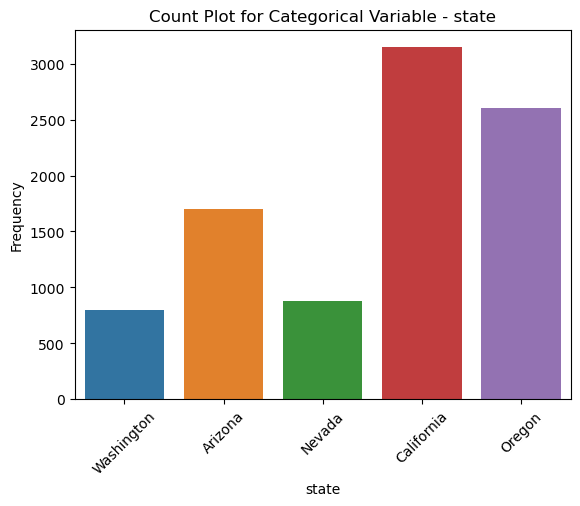

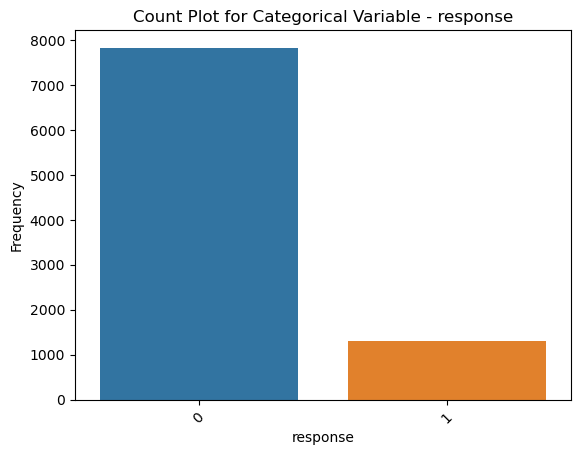

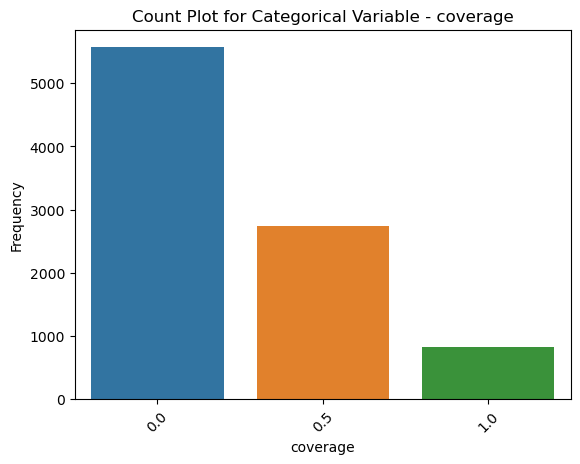

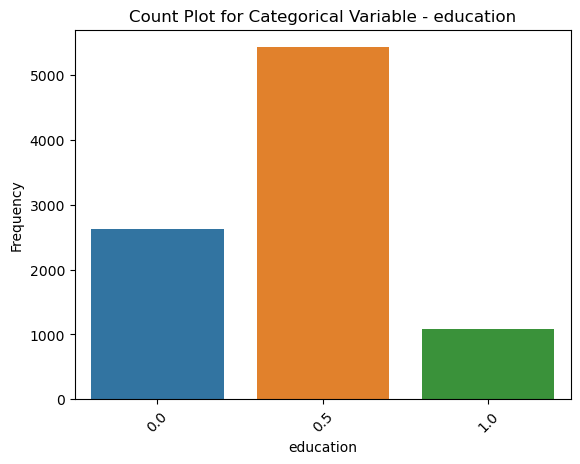

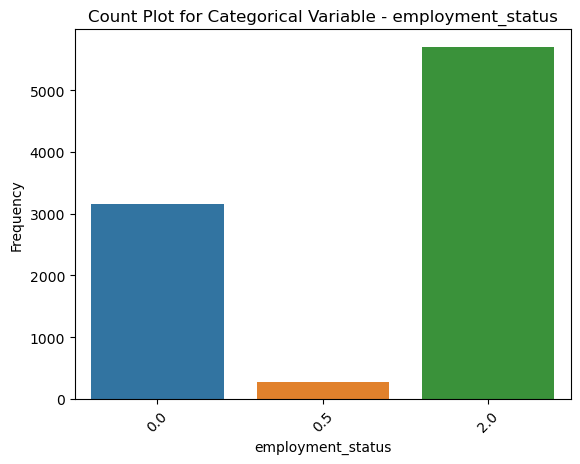

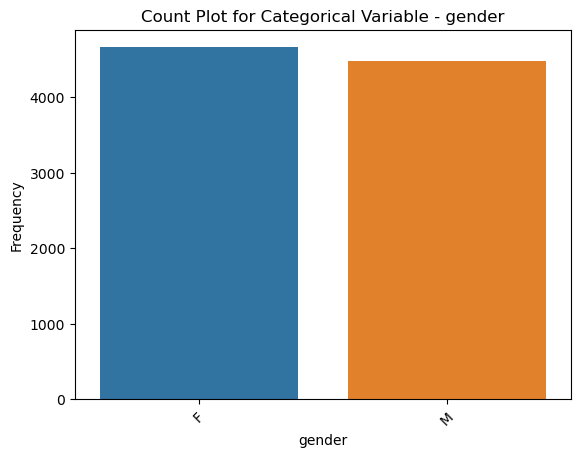

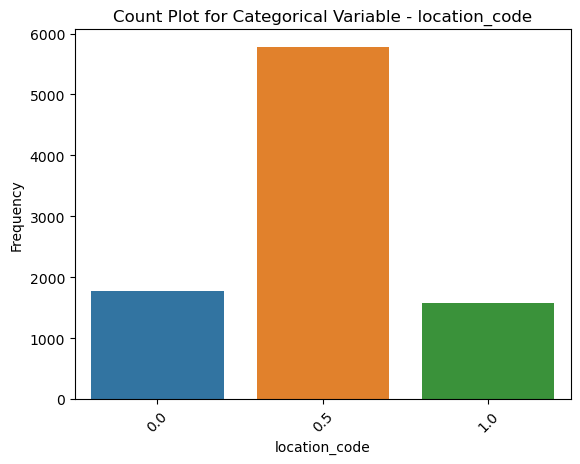

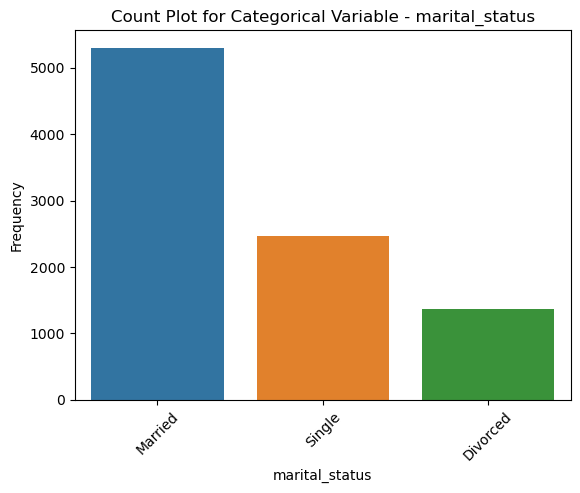

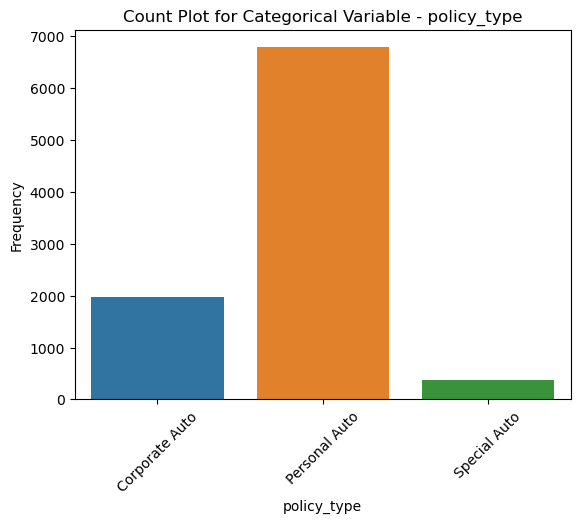

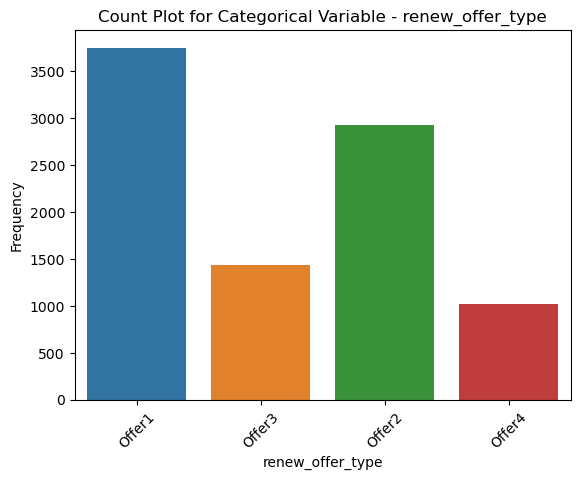

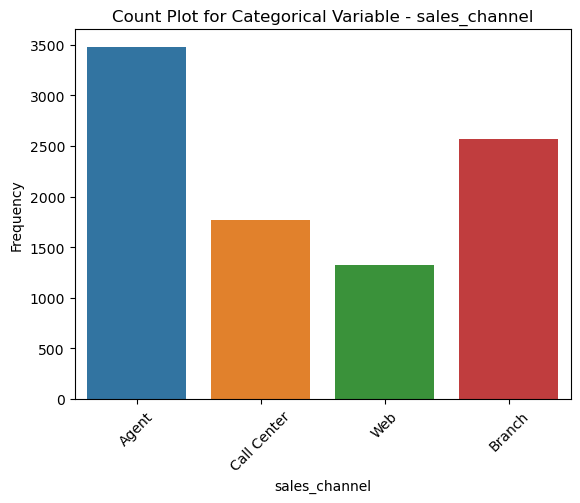

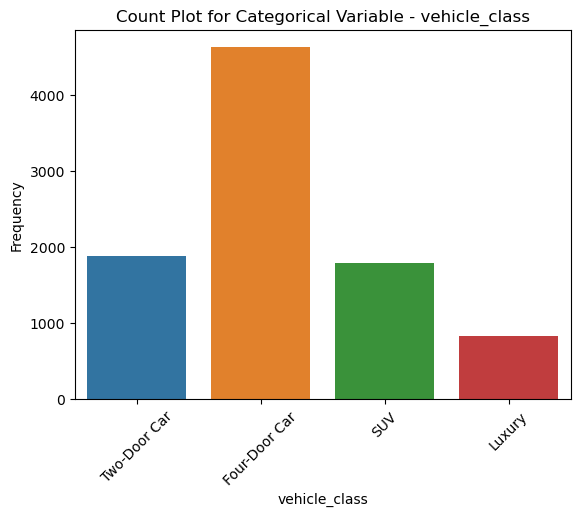

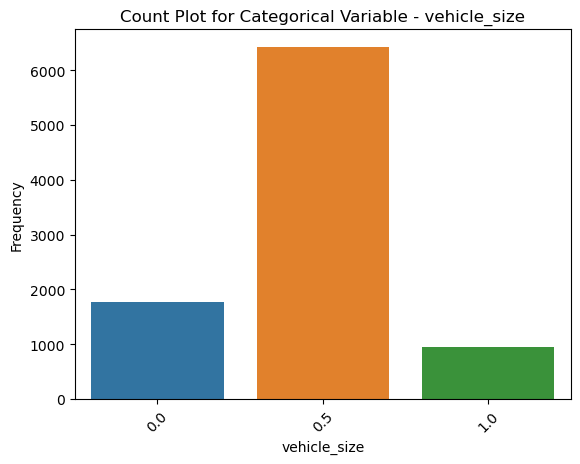

In [64]:
plot_categorical_variables(categorical_df)

In [65]:
# Comments:

# After adapting the categorical columns, avoiding redundance and encoding many of them, 
# we can see that the plots shown now are clean, simplified and not redundant.

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them? Make any changes you feel are necessary.

In [66]:
# No more redundant columns. Already done above.

4. Plot time variable. Can you extract something from it?


In [67]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

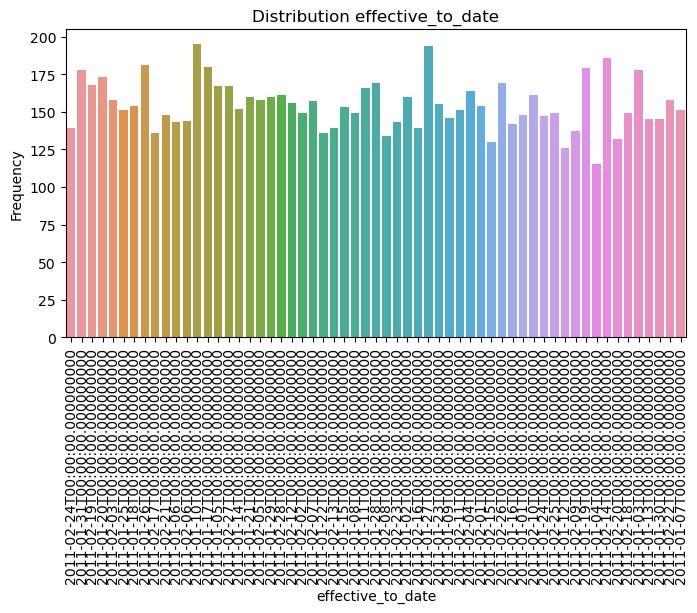

In [68]:
plt.figure(figsize=(8, 4))
sns.countplot(data=customer_df, x='effective_to_date')
plt.title('Distribution effective_to_date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Comments:

# The distribution provides info of how many data points are associated with each date in the dataset.

# We could observe temporal patterns, dates with significantly higher or lower frequencies. 
# For example, dates like 2011-01-10 and 2011-01-27 have relatively high frequencies, 
# while 2011-01-04 has a lower frequency.

# Peaks in the distribution might be indicative of specific events, promotions, or activities that 
# occurred on those dates.

5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.


In [70]:
# Extracting day, week, and month as integers into new columns:

customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.week
customer_df['month'] = customer_df['effective_to_date'].dt.month

customer_df.head()

/var/folders/x2/s0hzmssd661c19sljyg0cl240000gn/T/ipykernel_10429/3273333417.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  customer_df['week'] = customer_df['effective_to_date'].dt.week


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2


In [71]:
# Adding those columns to the numerical_df:

numerical_df = pd.concat([numerical_df, customer_df[['day', 'week', 'month']]], axis=1)

numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,week,month
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,2
1,6979.535903,0,94,13,42,0,8,1131.464935,31,5,1
2,12887.431650,48767,108,18,38,0,2,566.472247,19,7,2
3,7645.861827,0,106,18,65,0,7,529.881344,20,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,3,5,2


In [72]:
# Saving it:

numerical_df.to_csv('numerical.csv', index=False)

-------------------------------------------------

# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

## Data Analysis Process

#### Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- Processing Data
- Modeling
- Validation
- Reporting

### Instructions

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


# ******************************************************

6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check LinearRegressor and KNeighborsRegressor.

9. You can check also the MLPRegressor for this task!

10. Check and discuss the results.

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

In [73]:
# Concatenate:

df = pd.concat([numerical_df, categorical_df], axis=1)

df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,week,...,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,24,8,...,0.5,2.0,F,0.5,Married,Corporate Auto,Offer1,Agent,Two-Door Car,0.5
1,6979.535903,0,94,13,42,0,8,1131.464935,31,5,...,0.5,0.0,F,0.5,Single,Personal Auto,Offer3,Agent,Four-Door Car,0.5
2,12887.431650,48767,108,18,38,0,2,566.472247,19,7,...,0.5,2.0,F,0.5,Married,Personal Auto,Offer1,Agent,Two-Door Car,0.5
3,7645.861827,0,106,18,65,0,7,529.881344,20,3,...,0.5,0.0,M,0.5,Married,Corporate Auto,Offer1,Call Center,SUV,0.5
4,2813.692575,43836,73,12,44,0,1,138.130879,3,5,...,0.5,2.0,M,0.0,Single,Personal Auto,Offer1,Agent,Four-Door Car,0.5


In [74]:
# Split:

X = df.drop(columns=['total_claim_amount'], axis=1)
y = df['total_claim_amount']

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (7307, 23)
y_train = (7307,)
X_test = (1827, 23)
y_test = (1827,)


In [77]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,...,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
5123,4768.955924,51144,61,28,32,1,9,10,2,1,...,0.5,2.0,M,1.0,Married,Personal Auto,Offer1,Agent,Two-Door Car,0.5
7738,2827.559570,0,79,30,25,0,1,18,7,2,...,0.5,0.0,F,0.5,Single,Special Auto,Offer3,Branch,Four-Door Car,0.5
214,2912.892035,81097,74,7,67,0,1,28,9,2,...,0.5,2.0,M,0.5,Divorced,Personal Auto,Offer4,Agent,Four-Door Car,0.0
8580,5138.244998,72264,64,2,66,0,9,8,1,1,...,0.5,2.0,F,1.0,Married,Corporate Auto,Offer3,Web,Four-Door Car,0.5
7857,2610.369217,54737,66,3,86,0,1,18,3,1,...,0.5,2.0,F,0.5,Single,Personal Auto,Offer3,Web,Four-Door Car,0.5


In [78]:
X_test.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,...,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
708,4222.631209,74585,106,1,49,0,1,17,3,1,...,0.0,2.0,M,0.0,Married,Personal Auto,Offer2,Agent,SUV,0.5
47,5514.344018,23218,71,7,10,0,4,2,52,1,...,0.0,2.0,F,0.5,Single,Personal Auto,Offer4,Agent,Two-Door Car,0.5
3995,3808.122147,94903,94,3,38,0,1,28,4,1,...,0.5,2.0,F,0.5,Married,Personal Auto,Offer2,Agent,Two-Door Car,0.0
1513,7914.823110,77153,99,3,27,1,5,9,6,2,...,0.5,2.0,F,1.0,Married,Personal Auto,Offer1,Branch,Four-Door Car,0.5
3686,7931.722181,23769,69,18,14,0,2,20,7,2,...,0.0,0.0,F,0.5,Divorced,Personal Auto,Offer1,Branch,Four-Door Car,0.5


2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [79]:
# Defining variables:

X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

display(X_train_num)
display(X_train_cat)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,response,coverage,education,employment_status,location_code,vehicle_size
5123,4768.955924,51144,61,28,32,1,9,10,2,1,0,0.0,0.5,2.0,1.0,0.5
7738,2827.559570,0,79,30,25,0,1,18,7,2,0,0.5,0.5,0.0,0.5,0.5
214,2912.892035,81097,74,7,67,0,1,28,9,2,0,0.0,0.5,2.0,0.5,0.0
8580,5138.244998,72264,64,2,66,0,9,8,1,1,0,0.0,0.5,2.0,1.0,0.5
7857,2610.369217,54737,66,3,86,0,1,18,3,1,0,0.0,0.5,2.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2,29,4,1,0,0.0,0.5,2.0,0.5,0.0
5191,5498.940679,22520,73,17,64,0,3,5,5,2,1,0.0,0.5,0.0,0.5,0.5
5390,8992.779137,0,129,13,4,0,7,27,4,1,0,0.5,0.0,0.0,0.5,0.5
860,14635.451580,0,139,5,56,0,2,27,8,2,1,0.5,0.5,0.0,0.5,0.5


,state,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
5123,Washington,M,Married,Personal Auto,Offer1,Agent,Two-Door Car
7738,Oregon,F,Single,Special Auto,Offer3,Branch,Four-Door Car
214,Arizona,M,Divorced,Personal Auto,Offer4,Agent,Four-Door Car
8580,California,F,Married,Corporate Auto,Offer3,Web,Four-Door Car
7857,Washington,F,Single,Personal Auto,Offer3,Web,Four-Door Car
...,...,...,...,...,...,...,...
5734,California,F,Divorced,Personal Auto,Offer3,Agent,Four-Door Car
5191,California,M,Married,Personal Auto,Offer1,Branch,Four-Door Car
5390,California,F,Single,Personal Auto,Offer1,Call Center,SUV
860,Arizona,F,Divorced,Personal Auto,Offer1,Call Center,SUV


In [80]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

display(X_test_num)
display(X_test_cat)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,response,coverage,education,employment_status,location_code,vehicle_size
708,4222.631209,74585,106,1,49,0,1,17,3,1,0,0.0,0.0,2.0,0.0,0.5
47,5514.344018,23218,71,7,10,0,4,2,52,1,0,0.0,0.0,2.0,0.5,0.5
3995,3808.122147,94903,94,3,38,0,1,28,4,1,1,0.5,0.5,2.0,0.5,0.0
1513,7914.823110,77153,99,3,27,1,5,9,6,2,0,0.5,0.5,2.0,1.0,0.5
3686,7931.722181,23769,69,18,14,0,2,20,7,2,0,0.0,0.0,0.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,8688.754812,59098,110,31,73,0,3,27,4,1,0,0.0,0.5,2.0,0.5,0.5
1880,7623.580733,69900,64,23,68,0,2,9,6,2,0,0.0,0.0,2.0,0.0,1.0
8472,4660.399573,89834,116,24,11,0,1,3,5,2,0,0.0,0.5,2.0,0.0,0.5
5967,2089.337182,0,63,30,6,1,1,23,8,2,0,0.0,0.0,0.0,0.5,0.0


,state,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
708,California,M,Married,Personal Auto,Offer2,Agent,SUV
47,Oregon,F,Single,Personal Auto,Offer4,Agent,Two-Door Car
3995,Oregon,F,Married,Personal Auto,Offer2,Agent,Two-Door Car
1513,California,F,Married,Personal Auto,Offer1,Branch,Four-Door Car
3686,Washington,F,Divorced,Personal Auto,Offer1,Branch,Four-Door Car
...,...,...,...,...,...,...,...
4855,Oregon,F,Divorced,Personal Auto,Offer2,Agent,SUV
1880,Arizona,M,Married,Personal Auto,Offer4,Branch,Two-Door Car
8472,Oregon,F,Married,Corporate Auto,Offer1,Branch,SUV
5967,Washington,M,Single,Personal Auto,Offer1,Agent,Four-Door Car


3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [81]:
# Scaling numerical columns:

In [82]:
display(X_train_num.head())
display(X_test_num.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,response,coverage,education,employment_status,location_code,vehicle_size
5123,4768.955924,51144,61,28,32,1,9,10,2,1,0,0.0,0.5,2.0,1.0,0.5
7738,2827.559570,0,79,30,25,0,1,18,7,2,0,0.5,0.5,0.0,0.5,0.5
214,2912.892035,81097,74,7,67,0,1,28,9,2,0,0.0,0.5,2.0,0.5,0.0
8580,5138.244998,72264,64,2,66,0,9,8,1,1,0,0.0,0.5,2.0,1.0,0.5
7857,2610.369217,54737,66,3,86,0,1,18,3,1,0,0.0,0.5,2.0,0.5,0.5


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,week,month,response,coverage,education,employment_status,location_code,vehicle_size
708,4222.631209,74585,106,1,49,0,1,17,3,1,0,0.0,0.0,2.0,0.0,0.5
47,5514.344018,23218,71,7,10,0,4,2,52,1,0,0.0,0.0,2.0,0.5,0.5
3995,3808.122147,94903,94,3,38,0,1,28,4,1,1,0.5,0.5,2.0,0.5,0.0
1513,7914.823110,77153,99,3,27,1,5,9,6,2,0,0.5,0.5,2.0,1.0,0.5
3686,7931.722181,23769,69,18,14,0,2,20,7,2,0,0.0,0.0,0.0,0.5,0.5


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
# On Train and Test:

transformer = StandardScaler().fit(X_train_num)
numericals_train_standardized = transformer.transform(X_train_num)
numericals_test_standardized = transformer.transform(X_test_num)

In [85]:
display(numericals_train_standardized)
numericals_test_standardized 

array([[-0.4791244 ,  0.45134656, -0.93902843, ...,  0.77367446,
         1.67878048,  0.16257659],
       [-0.76499347, -1.24271378, -0.41995333, ..., -1.32692537,
         0.02400522,  0.16257659],
       [-0.75242833,  1.44349011, -0.56414086, ...,  0.77367446,
         0.02400522, -1.70820626],
       ...,
       [ 0.14283022, -1.24271378,  1.02192195, ..., -1.32692537,
         0.02400522,  0.16257659],
       [ 0.97370926, -1.24271378,  1.31029701, ..., -1.32692537,
         0.02400522,  0.16257659],
       [-0.68811765,  1.34395445, -0.2757658 , ...,  0.77367446,
         1.67878048,  0.16257659]])

array([[-0.55957028,  1.22779088,  0.35865932, ...,  0.77367446,
        -1.63077003,  0.16257659],
       [-0.36936659, -0.47365596, -0.65065337, ...,  0.77367446,
         0.02400522,  0.16257659],
       [-0.62060641,  1.900791  ,  0.01260926, ...,  0.77367446,
         0.02400522, -1.70820626],
       ...,
       [-0.49510923,  1.73288877,  0.64703438, ...,  0.77367446,
        -1.63077003,  0.16257659],
       [-0.87369613, -1.24271378, -0.88135342, ..., -1.32692537,
         0.02400522, -1.70820626],
       [ 1.19715306, -1.24271378,  0.44517184, ..., -1.32692537,
         0.02400522,  2.03335943]])

4. Encode the categorical variables X_train_cat and X_test_cat 

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
# On Train and Test:

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [88]:
display(categoricals_train_encoded)
categoricals_test_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [89]:
# Concatenate the scaled and encoded ones with np because they are arrays:

X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded], axis = 1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded], axis = 1)

6. Try a simple linear regression with all the data to see whether we are getting good results.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [91]:
lm = LinearRegression()

In [92]:
lm.fit(X_train, y_train)

LinearRegression()

In [93]:
prediction = lm.predict(X_test)
prediction

array([313.7366577 , 434.07310458, 313.01058152, ..., 247.23283305,
       543.92782535, 555.63396367])

In [94]:
y_test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4855    665.931223
1880     33.970000
8472     43.155950
5967    453.600000
7971    852.460341
Name: total_claim_amount, Length: 1827, dtype: float64

In [95]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 30442.274342440767
RMSE: 174.47714561638372
MAE: 128.72705944566763
R2: 0.6171314820157151


7. Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [97]:
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    
    results={}
    
    for model in models:
        
        model_name=model.__class__.__name__
        model.fit(X_train, y_train)
        prediction=model.predict(X_test)
        
        metrics = {} 
        
        mse = mean_squared_error(y_test, prediction)
        mae = mean_absolute_error(y_test, prediction)
        r2 = r2_score(y_test, prediction)
        metrics['MSE'] = mse
        metrics['MAE'] = mae
        metrics['R2'] = r2

        results[model_name] = metrics

    return results

8. Use the function to check LinearRegressor and KNeighborsRegressor.

In [98]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=3)]

In [99]:
results = train_evaluate_models(models, X_train, y_train, X_test, y_test)

In [100]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Model: LinearRegression
MSE: 30442.274342440767
MAE: 128.72705944566763
R2: 0.6171314820157151

Model: KNeighborsRegressor
MSE: 25294.849972461714
MAE: 98.91984693103447
R2: 0.6818699676426749



9. You can check also the MLPRegressor for this task!

In [101]:
models = [MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)]
results = train_evaluate_models(models, X_train, y_train, X_test, y_test)

In [102]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Model: MLPRegressor
MSE: 19398.66405892219
MAE: 93.98163548335768
R2: 0.7560255296444758



10. Check and discuss the results.

In [103]:
# Comments:

# LR:

# The LM model has an R2 value of 0.617, it explains 61.7% of the variance in the target variable. 
# The MSE and MAE are relatively high, suggesting that the model has room for improvement in terms of accuracy.


# KNN:

# The KNN model is slightly better with an R2 of 0.682. 
# It has a lower MSE and MAE compared to the LR model, indicating better accuracy.

# MLPR:

# The MLPR, the better model with an R2 value of 0.75. 
# It has the lowest MSE and MAE, indicating the best predictive performance among the three models.


# Overall, the MLPR model appears to be the best-performing model looking at R2 and predictive accuracy. 